<a href="https://colab.research.google.com/github/popthart/Machine-learning/blob/cs-homework/Week_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
diabetes.data.shape

(442, 10)

In [5]:
diabetes.target.shape

(442,)

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
import pandas as pd

In [8]:
pd.set_option('display.precision', 4)

In [9]:
pd.set_option('display.max_columns', 11)

In [10]:
pd.set_option('display.width', None)

In [11]:
diabetes_df = pd.DataFrame(diabetes.data,
                             columns=diabetes.feature_names)

In [12]:
diabetes_df['1yr'] = pd.Series(diabetes.target)

In [16]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,1yr
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


In [21]:
pd.set_option('display.float_format', '{:.4f}'.format)
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,1yr
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,1521.3348
std,0.4762,0.4762,0.4762,0.4762,0.4762,0.4762,0.4762,0.4762,0.4762,0.4762,770.9300
min,-1.0723,-0.4464,-0.9028,-1.1240,-1.2678,-1.1561,-1.0231,-0.7639,-1.2610,-1.3777,250.0000
25%,-0.3730,-0.4464,-0.3423,-0.3666,-0.3425,-0.3036,-0.3512,-0.3949,-0.3325,-0.3318,870.0000
50%,0.0538,-0.4464,-0.0728,-0.0567,-0.0432,-0.0382,-0.0658,-0.0259,-0.0195,-0.0108,1405.0000
75%,0.3808,0.5068,0.3125,0.3564,0.2836,0.2984,0.2931,0.3431,0.3243,0.2792,2115.0000
max,1.1073,0.5068,1.7056,1.3204,1.5391,1.9879,1.8118,1.8523,1.3360,1.3561,3460.0000


In [22]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

In [25]:
sns.set_style('whitegrid')

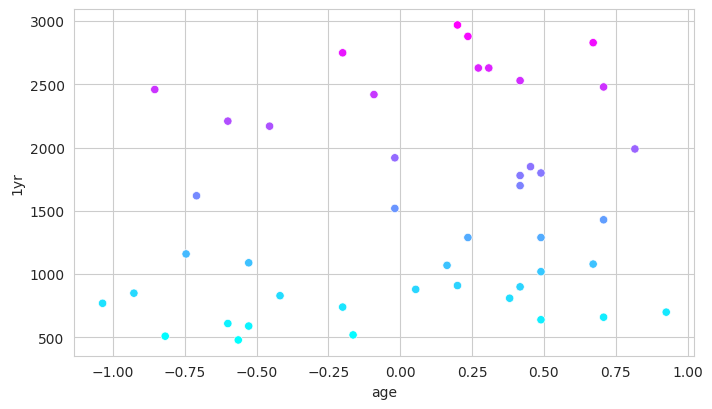

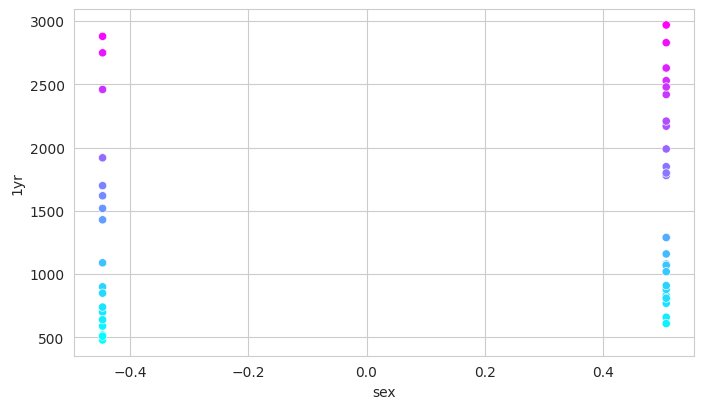

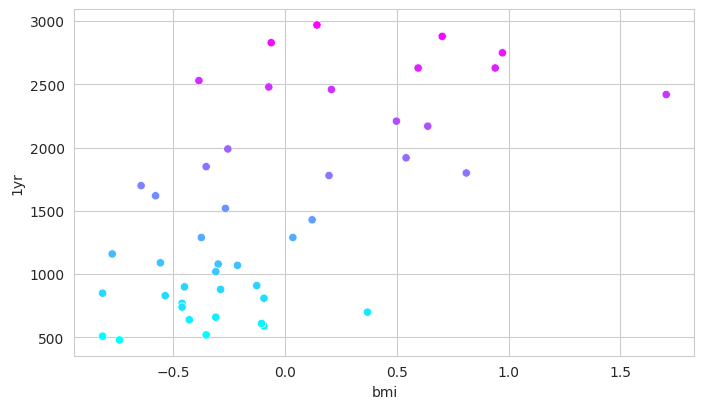

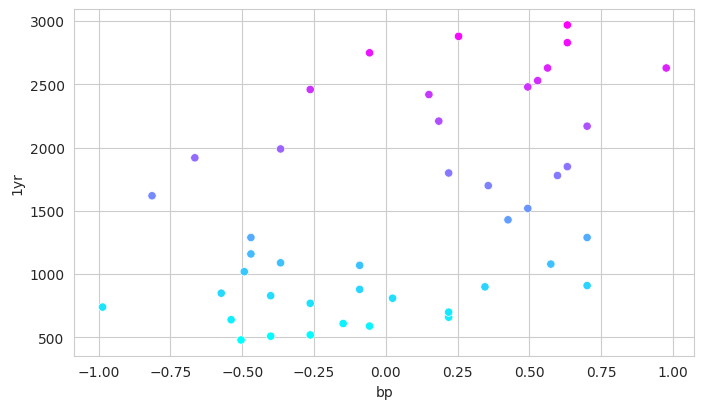

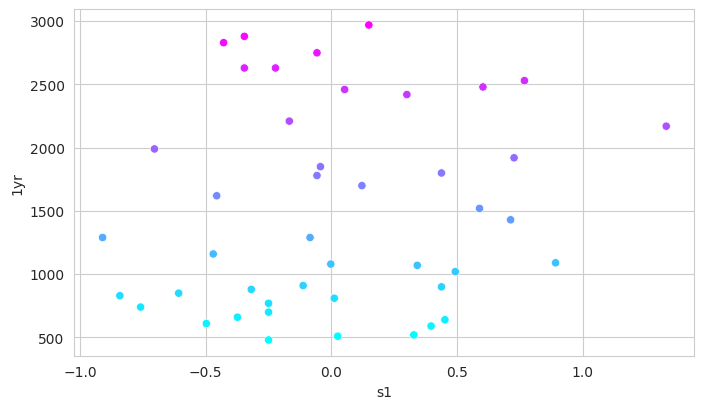

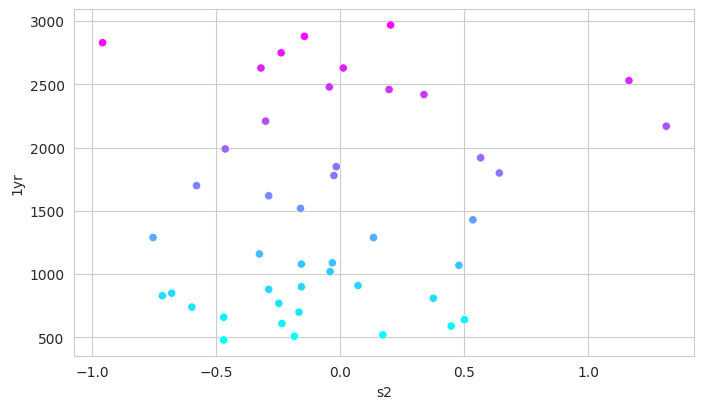

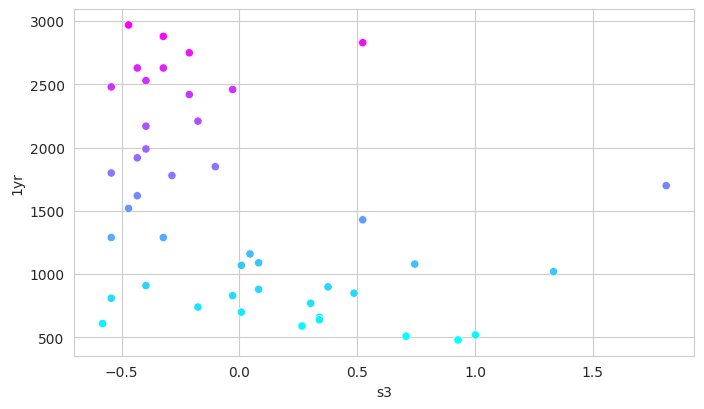

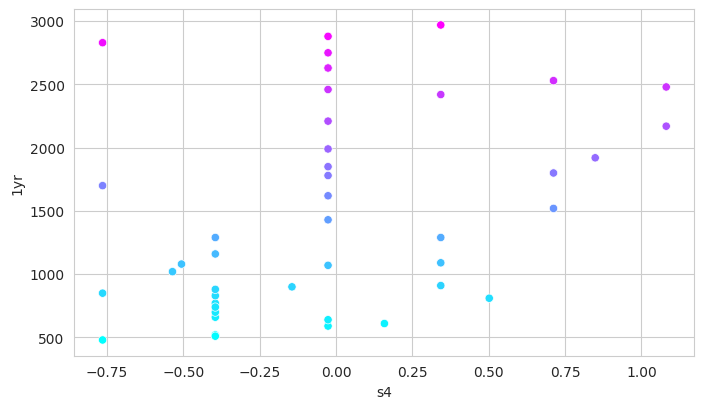

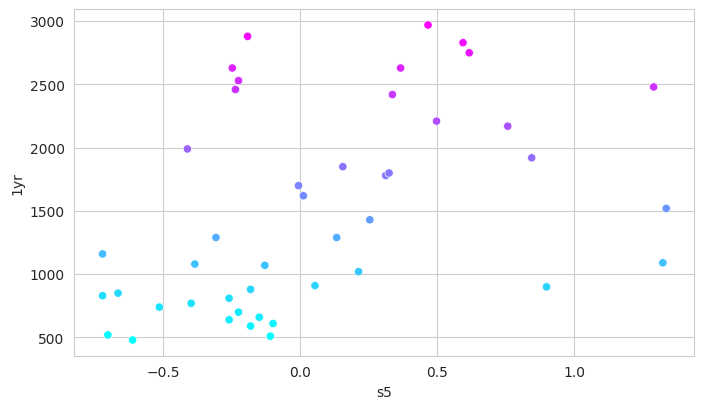

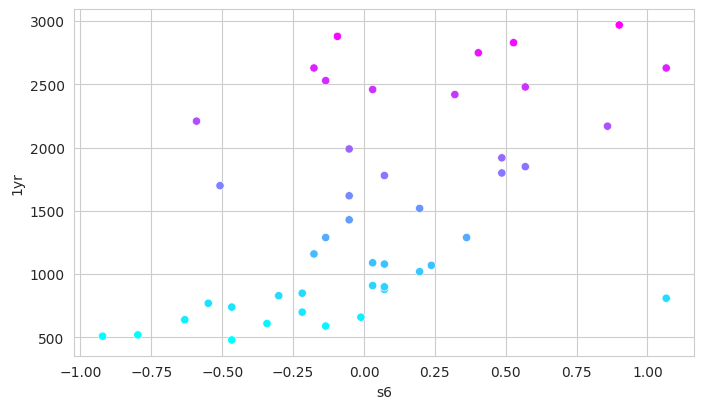

In [27]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(data=sample_df, x=feature,
                    y='1yr', hue='1yr',
                    palette='cool', legend=False)

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [31]:
X_train.shape

(331, 10)

In [32]:
X_test.shape

(111, 10)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
linear_regression = LinearRegression()

In [35]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [36]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [37]:
linear_regression.intercept_

152.22822762230342

In [38]:
predicted = linear_regression.predict(X_test)

In [39]:
expected = y_test

In [40]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [41]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [42]:
df = pd.DataFrame()

In [43]:
df['Expected'] = pd.Series(expected)

In [44]:
df['Predicted'] = pd.Series(predicted)

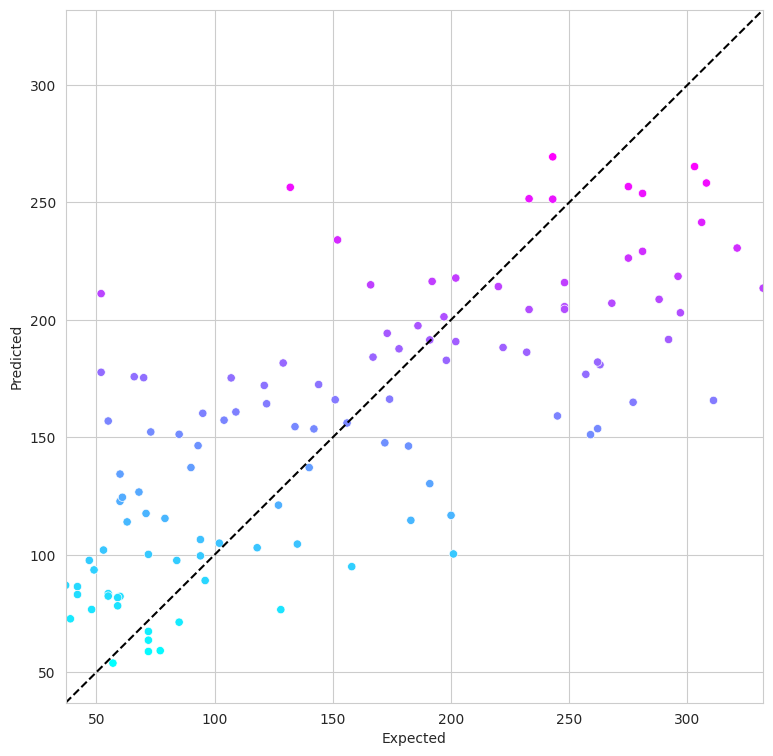

In [45]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
      hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start,end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [46]:
from sklearn import metrics

In [47]:
metrics.r2_score(expected, predicted)

0.5322429620529407

In [48]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [49]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [50]:
from sklearn.model_selection import KFold, cross_val_score

In [55]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=diabetes.data, y=diabetes.target, cv=kfold,
                             scoring= 'r2')
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 score = {scores.mean():.3f}')

LinearRegression: mean of r2 score = 0.475
      ElasticNet: mean of r2 score = -0.002
           Lasso: mean of r2 score = 0.339
           Ridge: mean of r2 score = 0.421
